## Update SIR

Updates counts of Susceptibles, Infecteds and Removeds with equations:
\begin{align*}S(t_{i}+dt)&=S(t_{i})-\lambda\cdot{S(t_{i})}\cdot{I(t_{i})}\cdot{dt},\\
I(t_{i}+dt)&=I(t_{i})+\lambda\cdot{S(t_{i})}\cdot{I(t_{i})}\cdot{dt}-\gamma\cdot{I(t_{i})}\cdot{dt},\\
R(t_{i}+dt)&=R(t_{i})+\gamma\cdot{I(t_{i})}\cdot{dt},\end{align*} where $\lambda$ is infection rate parameter and $\gamma$ is recovery rate parameter.

In [1]:
function updateSIR(popnvector)
    susceptibles = popnvector[1]
    infecteds = popnvector[2]
    removeds = popnvector[3]
    
    newS = susceptibles - lambda * susceptibles * infecteds * dt
    newI = infecteds + lambda * susceptibles * infecteds * dt - gam * infecteds * dt
    newR = removeds + gam * infecteds * dt
    
    return [newS newI newR]
end

updateSIR (generic function with 1 method)

In [2]:
dt = 0.5
tfinal = 610
lambda = 1/20000
gam = 1/10

s, i, r = 10000.0, 4., 0.

nsteps = round(Int64, tfinal/dt)
resultvals = Array(Float64, nsteps+1, 3)
timevec = Array(Float64, nsteps+1)

resultvals[1,:] = [s i r]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end


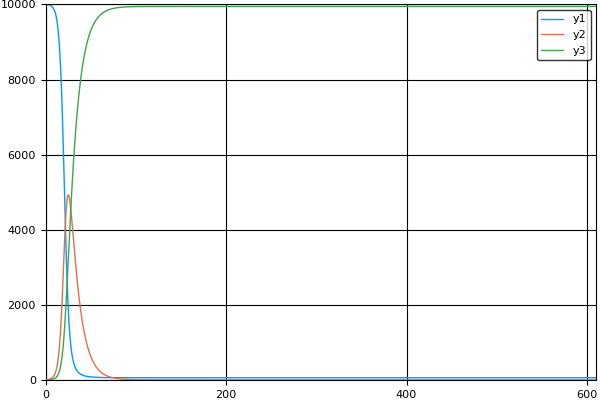

sys:1: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [3]:
using Plots
pyplot()
plot(timevec, resultvals)